# Text Generation (Shakespeare Sonnets Exercise)

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
#from tensorflow.keras.regularizers import l2
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np
import tensorflow as tf

In [2]:
import os
import wget

url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt'
out = f'{os.getcwd()}\\sonnets.txt'

if not os.path.isfile(out):
    wget.download(url, out=out)

In [3]:
tokenizer = Tokenizer()

data = open(f'{os.getcwd()}\\sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1 # one more for OOV

print("Vocabulary length: ",total_words)

Vocabulary length:  3211


In [4]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

# one-hot-encoding of label tokens
label = ku.to_categorical(label, num_classes=total_words)

In [6]:
# design neural network with LSTM

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1)) # Your Embedding Layer
model.add(Bidirectional(LSTM(150, return_sequences = True))) # An LSTM Layer
model.add(Dropout(.2)) # A dropout layer
model.add(Bidirectional(LSTM(150))) # Another LSTM Layer
model.add(Dense(total_words/2,
                activation='relu',
                kernel_regularizer=tf.keras.regularizers.l2(0.01))) # A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax')) # A Dense Layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Pick a loss function and an optimizer

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 64)            205504    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           258000    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               541200    
_________________________________________________________________
dense (Dense)                (None, 1605)              483105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,644,675
Trainable params: 6,644,675
Non-trainable params: 0
____________________________________________

In [7]:
 # train
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 5s 11ms/step - loss: 7.0449 - accuracy: 0.0214
Epoch 2/100
484/484 [==============================] - 5s 11ms/step - loss: 6.5259 - accuracy: 0.0224
Epoch 3/100
484/484 [==============================] - 5s 11ms/step - loss: 6.4326 - accuracy: 0.0257
Epoch 4/100
484/484 [==============================] - 5s 11ms/step - loss: 6.3160 - accuracy: 0.0331
Epoch 5/100
484/484 [==============================] - 5s 11ms/step - loss: 6.1892 - accuracy: 0.0366
Epoch 6/100
484/484 [==============================] - 5s 11ms/step - loss: 6.0656 - accuracy: 0.0369
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 5.9486 - accuracy: 0.0417
Epoch 8/100
484/484 [==============================] - 5s 11ms/step - loss: 5.8399 - accuracy: 0.0466
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 5.7264 - accuracy: 0.0515
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 5.620

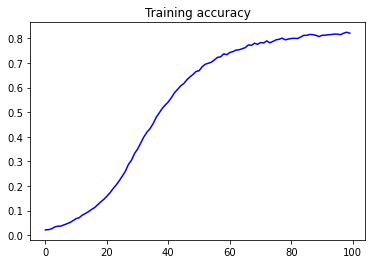

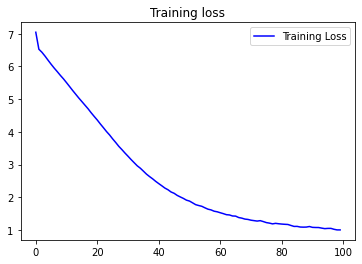

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope to stay thy mind ' unused lie in all away best canst in your large excuse men's stay thee back to stand each and twain express not shame add thine best come hath thee doth die in thee away away express not best bright be right thee so in her moan me heart away seem none cold right thee shall common common day her face express men's 'no ' doth common cruel give thy best shall stand set new ' pace twain thee so far dead face but thine ' ' then know but your own name so rise and
